In [84]:
import re, json, cv2, itertools, os
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_json("./iter31_InstanceGroup2Desccamera_0camera_Shape0_bbox.json")
df.head()

id  category                   rect  pixels
0   0     spoon       [824, 0, 33, 77]     670
1   1  clearCup  [1239, 187, 138, 128]   12824
2   2     knife   [1038, 150, 65, 241]    3543
3   3     spoon   [592, 468, 173, 204]    6159
4   4      fork   [1211, 159, 72, 137]    1303

In [110]:
FILESHARE_IMG_PATH = '/mnt/zerowasteimages/project_zero/ds1/parsed/'

def print_image(name):
    image_path = os.path.join(FILESHARE_IMG_PATH, name)
    plt.figure(figsize=(9,6))
    image = cv2.imread(image_path)
    plt.imshow(image) 
    plt.show()

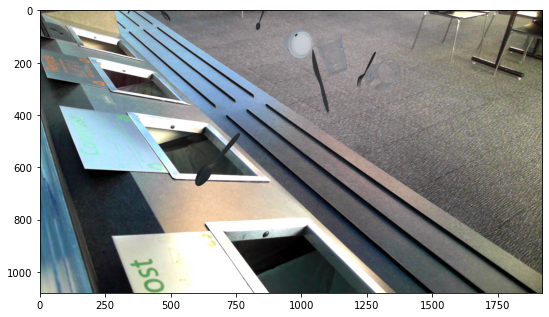

In [111]:
SAMPLE_IMG = 'iter31_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg'
print_image(SAMPLE_IMG)

In [339]:
def custom_reader(path):
    
    base_filename = os.path.basename(path)
    d = pd.read_json(path)
    d['ymin'] = d.rect.apply(lambda x: x[1])
    d['xmax'] = d.rect.apply(lambda x: x[0]+x[2])
    d['ymax'] = d.rect.apply(lambda x: x[1]+x[3])
    d['bbox'] = d.rect.apply(lambda x: x)
    iter_num, instance_group, camera_scene, shape_id, _ = base_filename.split('_',4)
    d['filename'] = base_filename[:-9]+"rgb.jpg"
    d['height'] = 1080
    d['width'] = 1920
    d['iter_num'] = iter_num
    d['camera_scene'] = camera_scene
    d['shape_id'] = shape_id
    return d


#PATH1 = "/home/redne/zw_torch/ds1_samples/"
allfiles = glob.glob(FILESHARE_IMG_PATH+"*.json")
df = pd.concat((custom_reader(f) for f in allfiles))
df = df.reset_index()
df.to_csv("./ds01_v1_052420.csv", index=False)
df.head()

index  id   category                  rect  pixels  xmin  ymin  xmax  ymax  \
0      0   1       fork  [1195, 302, 121, 30]    1782  1195   302  1316   332   
1      1   2  coffeeCup  [899, 276, 222, 236]   29705   899   276  1121   512   
2      2   3   clearCup  [619, 395, 257, 167]   34122   619   395   876   562   
3      3   4   clearCup   [1230, 0, 142, 155]   12867  1230     0  1372   155   
4      4   5   clearCup      [331, 0, 80, 41]    2616   331     0   411    41   

                   bbox                                           filename  \
0  [1195, 302, 121, 30]  iter0_InstanceGroup2Desccamera_0camera_Shape0_...   
1  [899, 276, 222, 236]  iter0_InstanceGroup2Desccamera_0camera_Shape0_...   
2  [619, 395, 257, 167]  iter0_InstanceGroup2Desccamera_0camera_Shape0_...   
3   [1230, 0, 142, 155]  iter0_InstanceGroup2Desccamera_0camera_Shape0_...   
4      [331, 0, 80, 41]  iter0_InstanceGroup2Desccamera_0camera_Shape0_...   

   height  width iter_num camera_scene shape_id  
0    1080   1920    iter0      0camera   Shape0  
1    1080   1920    iter0      0camera   Shape0  
2    1080   1920    iter0      0camera   Shape0  
3    1080   1920    iter0      0camera   Shape0  
4    1080   1920    iter0      0camera   Shape0

In [340]:
df[(df['category']=="fork")].pixels.quantile([.001,.1,.05,.15,.5, .90, .95])

0.001       1.0
0.100     268.0
0.050     187.0
0.150     383.0
0.500    1424.5
0.900    5044.0
0.950    7153.0
Name: pixels, dtype: float64

In [363]:
sample_file_name_list = df.filename.sample(n=80)
sample_file_name_list[:2]

336     iter130_InstanceGroup2Desccamera_0camera_Shape...
4526    iter444_InstanceGroup2Desccamera_0camera_Shape...
Name: filename, dtype: object

In [ ]:
import glob

In [344]:
def show_img_bb(iteration_num="random", labels_df=df, inquiry_path=FILESHARE_IMG_PATH):
    if iteration_num == "random": iteration_num = labels_df.iter_num.sample(n=1).values[0]
    grouped = labels_df.groupby('iter_num')
    group_df = grouped.get_group(iteration_num)
    group_df = group_df.reset_index()
    img_path = os.path.join(FILESHARE_IMG_PATH, group_df.filename[0])
    image = cv2.imread(img_path)
    
    # details of rectangle to be drawn.
    # From synthetics_code/sx_parseutils.py
    # @returns: Dictionary of pixelvalue --> bbox (as x,y,
    #x, y, w, h = group_df.rect[0]

    # Draw the bounding box
    #[cv2.rectangle(image,(x, y), (x + w, y + h), (0,255,0), thickness=2) for x, y, w, h in group_df.rect.values]   # draw a rectangle.
    box_colums = ['xmin', 'ymin', 'xmax', 'ymax']
    boxes_to_plot = group_df[box_colums].values
    [cv2.rectangle(image,(x_min, y_min), (x_max, y_max), (0,255,0), thickness=2) for x_min, y_min, x_max, y_max in boxes_to_plot]   # draw a rectangle.
    
    #print_image(img_path)
    plt.figure(figsize = (20,15))
    plt.imshow(image)
    


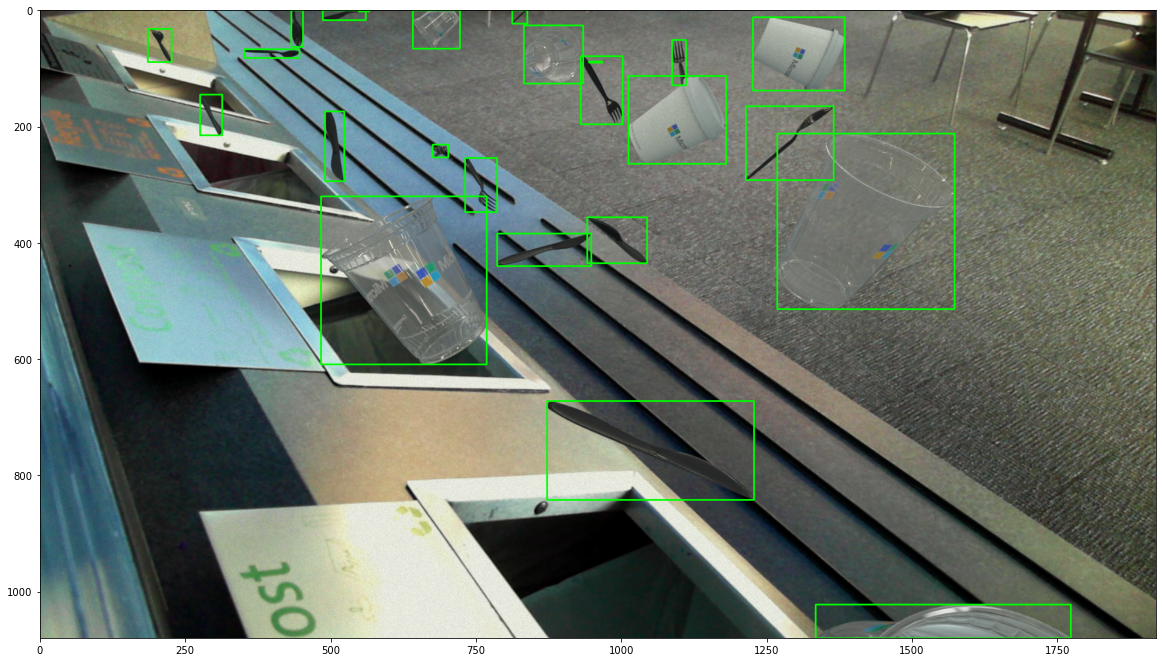

In [345]:
show_img_bb()

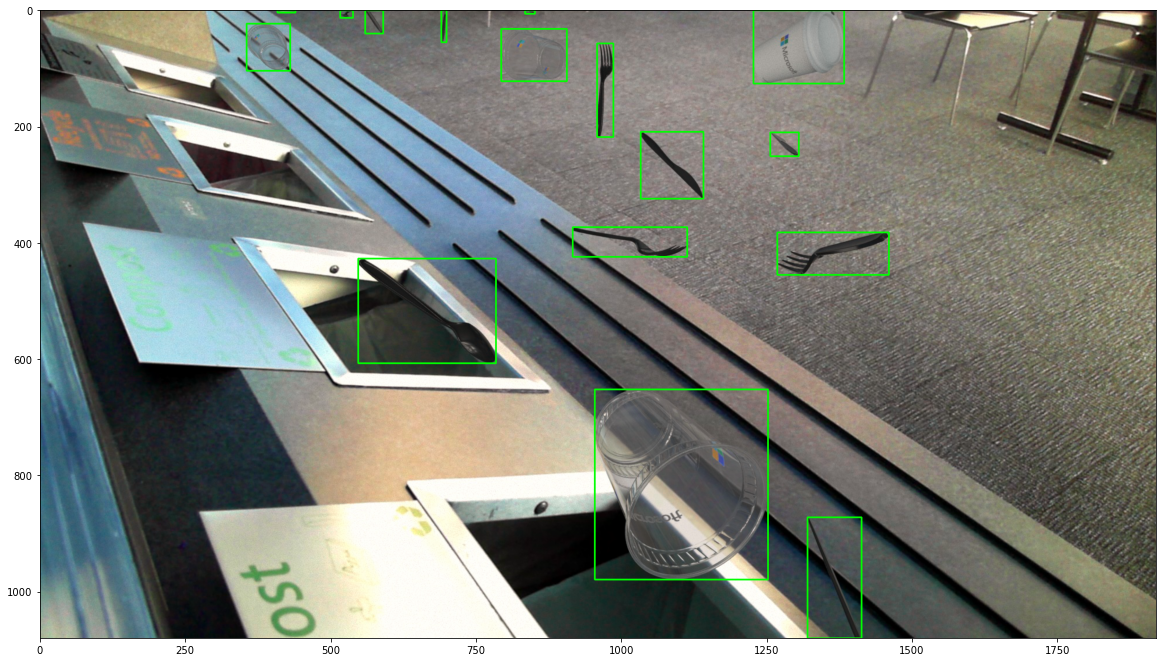

In [346]:
show_img_bb()

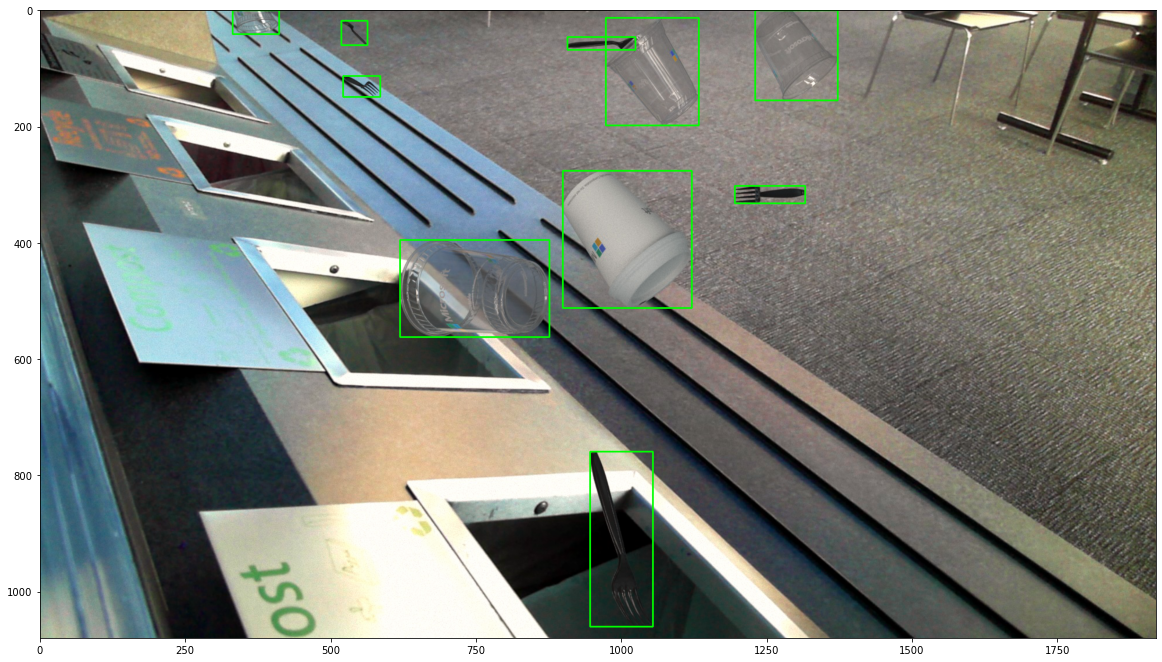

In [347]:
show_img_bb(iteration_num='iter0', labels_df=df)

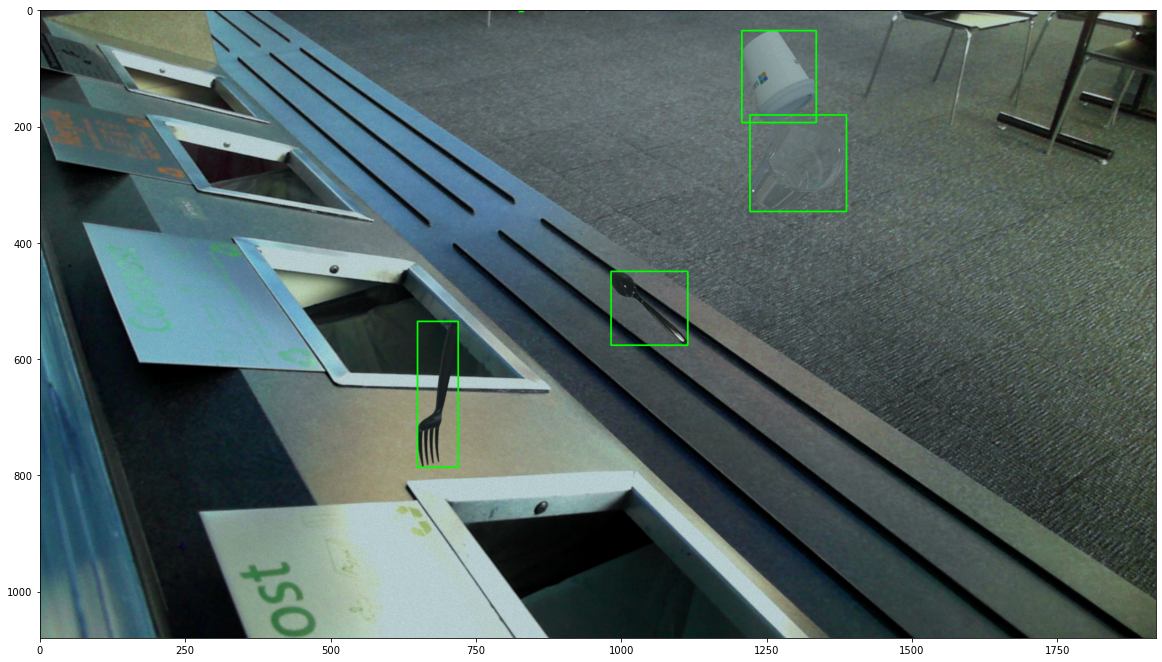

In [348]:
show_img_bb(iteration_num='iter157')

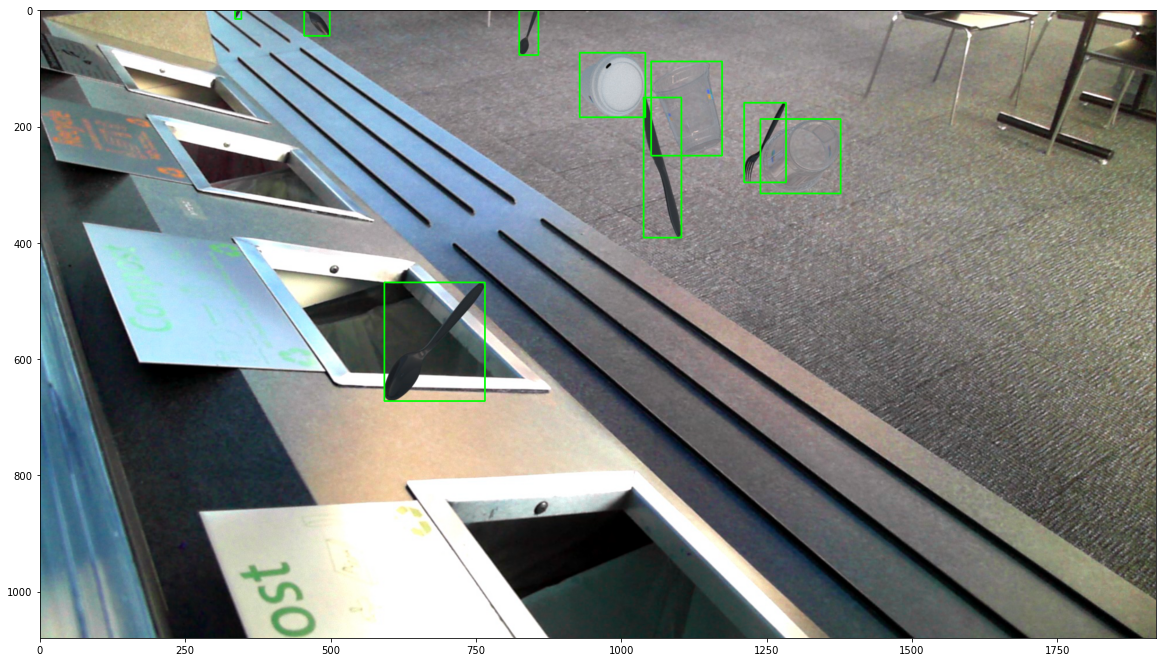

In [349]:
show_img_bb(iteration_num='iter31')